In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Initial Data Exploration

In [2]:
# Importing Data
bank = pd.read_csv('bank-additional-full.csv', delimiter= ';')

In [3]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Checking Data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#Checking for null values within data
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

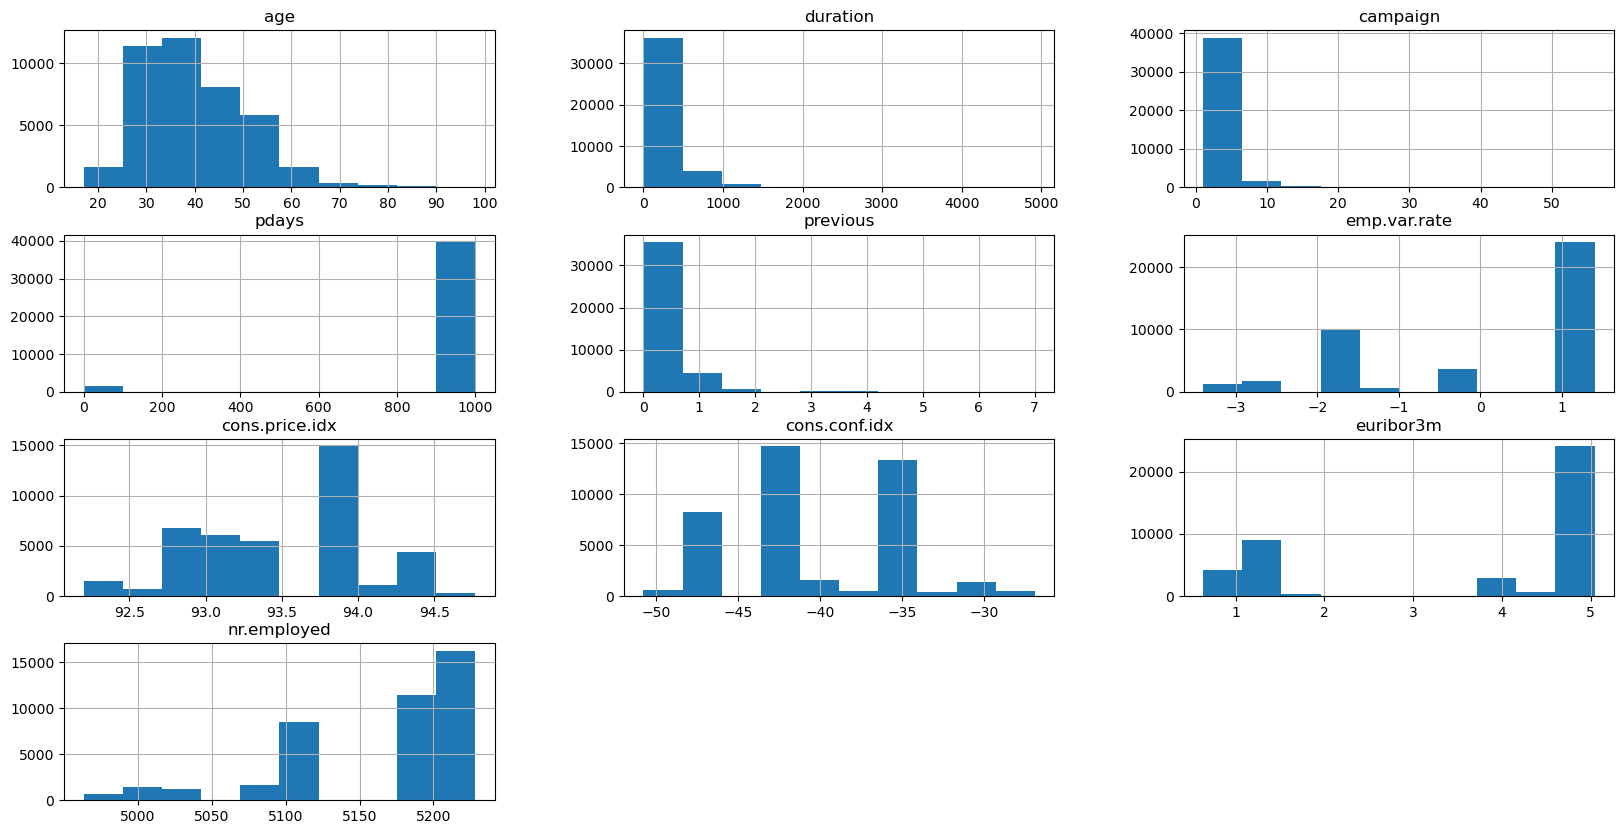

In [8]:
bank.hist(figsize=(20, 10))

C:\Users\vinny\AppData\Local\Temp\ipykernel_29088\959186648.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank.corr(), annot=True, cmap='YlGnBu')


<Axes: >

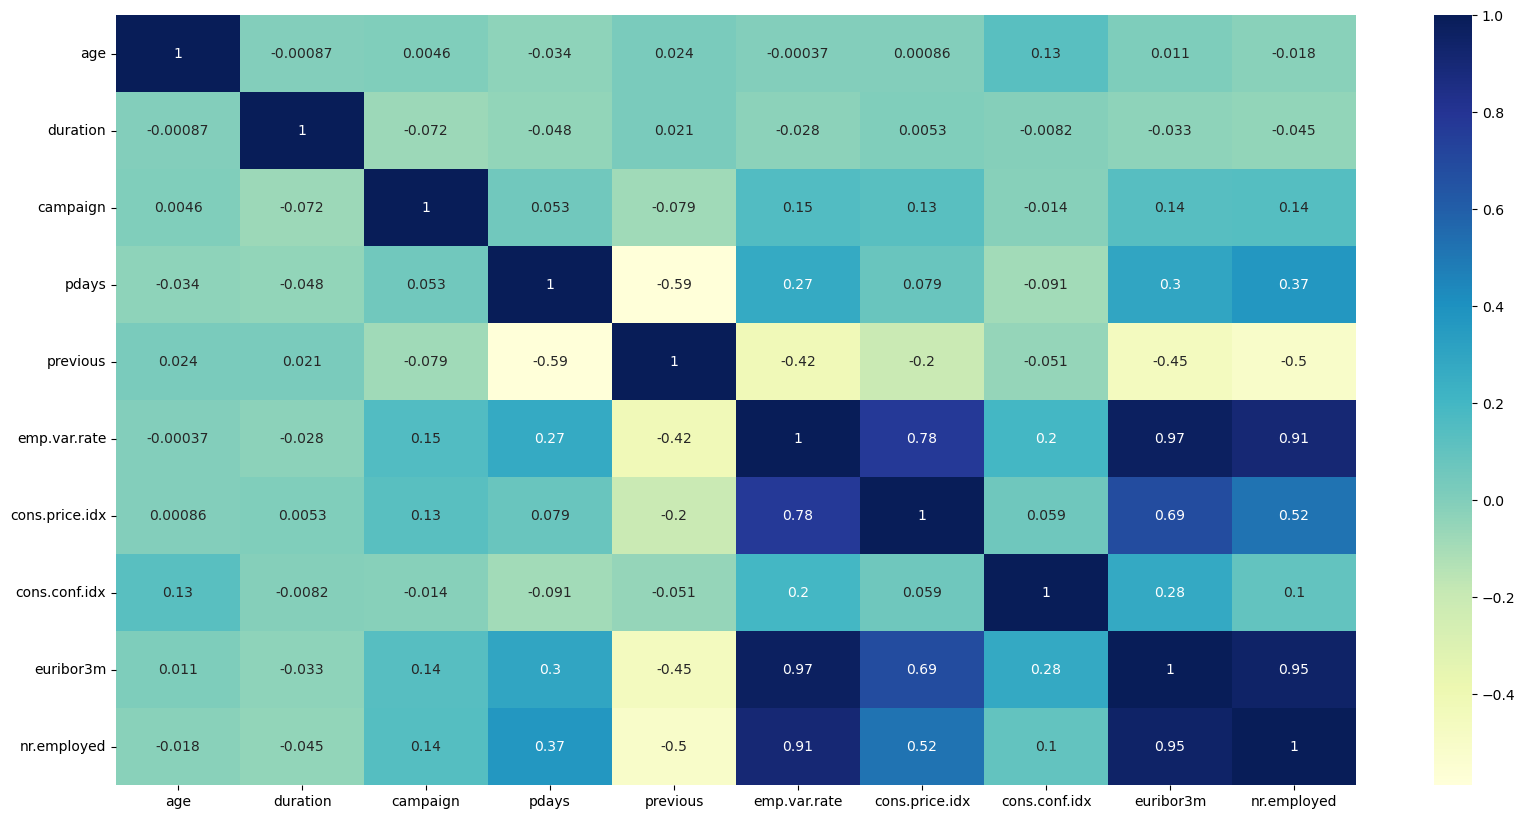

In [9]:
# Checking Correlation in Variables
plt.figure(figsize=(20,10))
sns.heatmap(bank.corr(), annot=True, cmap='YlGnBu')

# Processing Data

In [10]:
# Removing Variables that are highly correlated (0.95 or more)
bank_processed = bank.drop(['euribor3m', 'nr.employed','emp.var.rate'], axis=1)
bank_processed.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,93.994,-36.4,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,93.994,-36.4,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,93.994,-36.4,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,93.994,-36.4,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,93.994,-36.4,no


In [11]:
#Converting Age Columns into ranges instead of discrete values
bank_processed['age_range'] = pd.cut(bank_processed['age'], bins = 5, labels = [f'{i+1}'for i in range(5)])
bank_processed.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,age_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,no,3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,no,3
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,no,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,no,2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,no,3
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,93.994,-36.4,no,2
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,93.994,-36.4,no,3
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,93.994,-36.4,no,2
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,93.994,-36.4,no,1
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,93.994,-36.4,no,1


In [12]:
#Checking the Ranges of each "Group" created
print(bank_processed.groupby('age_range')['age'].min())
print(bank_processed.groupby('age_range')['age'].max())

age_range
1    17
2    34
3    50
4    66
5    82
Name: age, dtype: int64
age_range
1    33
2    49
3    65
4    81
5    98
Name: age, dtype: int64


In [13]:
#Converting Categorical Columns into Numerical for Analysis

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
columns = ['job','marital', 'education', 'default', 'contact', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'poutcome', 'y', 'age_range']
for column in columns:
    bank_processed[column] = label_enc.fit_transform(bank_processed[column])
bank_processed.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,age_range
0,56,3,1,0,0,0,0,1,6,1,261,0,26,0,1,93.994,-36.4,0,2
1,57,7,1,3,1,0,0,1,6,1,149,0,26,0,1,93.994,-36.4,0,2
2,37,7,1,3,0,2,0,1,6,1,226,0,26,0,1,93.994,-36.4,0,1
3,40,0,1,1,0,0,0,1,6,1,151,0,26,0,1,93.994,-36.4,0,1
4,56,7,1,3,0,0,2,1,6,1,307,0,26,0,1,93.994,-36.4,0,2
5,45,7,1,2,1,0,0,1,6,1,198,0,26,0,1,93.994,-36.4,0,1
6,59,0,1,5,0,0,0,1,6,1,139,0,26,0,1,93.994,-36.4,0,2
7,41,1,1,7,1,0,0,1,6,1,217,0,26,0,1,93.994,-36.4,0,1
8,24,9,2,5,0,2,0,1,6,1,380,0,26,0,1,93.994,-36.4,0,0
9,25,7,2,3,0,2,0,1,6,1,50,0,26,0,1,93.994,-36.4,0,0


In [14]:
#Dropping age column as no longer needed

bank_processed = bank_processed.drop(['age'], axis = 1)
bank_processed.head(10)

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y,age_range
0,3,1,0,0,0,0,1,6,1,261,0,26,0,1,93.994,-36.4,0,2
1,7,1,3,1,0,0,1,6,1,149,0,26,0,1,93.994,-36.4,0,2
2,7,1,3,0,2,0,1,6,1,226,0,26,0,1,93.994,-36.4,0,1
3,0,1,1,0,0,0,1,6,1,151,0,26,0,1,93.994,-36.4,0,1
4,7,1,3,0,0,2,1,6,1,307,0,26,0,1,93.994,-36.4,0,2
5,7,1,2,1,0,0,1,6,1,198,0,26,0,1,93.994,-36.4,0,1
6,0,1,5,0,0,0,1,6,1,139,0,26,0,1,93.994,-36.4,0,2
7,1,1,7,1,0,0,1,6,1,217,0,26,0,1,93.994,-36.4,0,1
8,9,2,5,0,2,0,1,6,1,380,0,26,0,1,93.994,-36.4,0,0
9,7,2,3,0,2,0,1,6,1,50,0,26,0,1,93.994,-36.4,0,0


In [15]:
#Ensuring all columns have full integrity
bank_processed.isnull().any()

job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
cons.price.idx    False
cons.conf.idx     False
y                 False
age_range         False
dtype: bool

<Axes: >

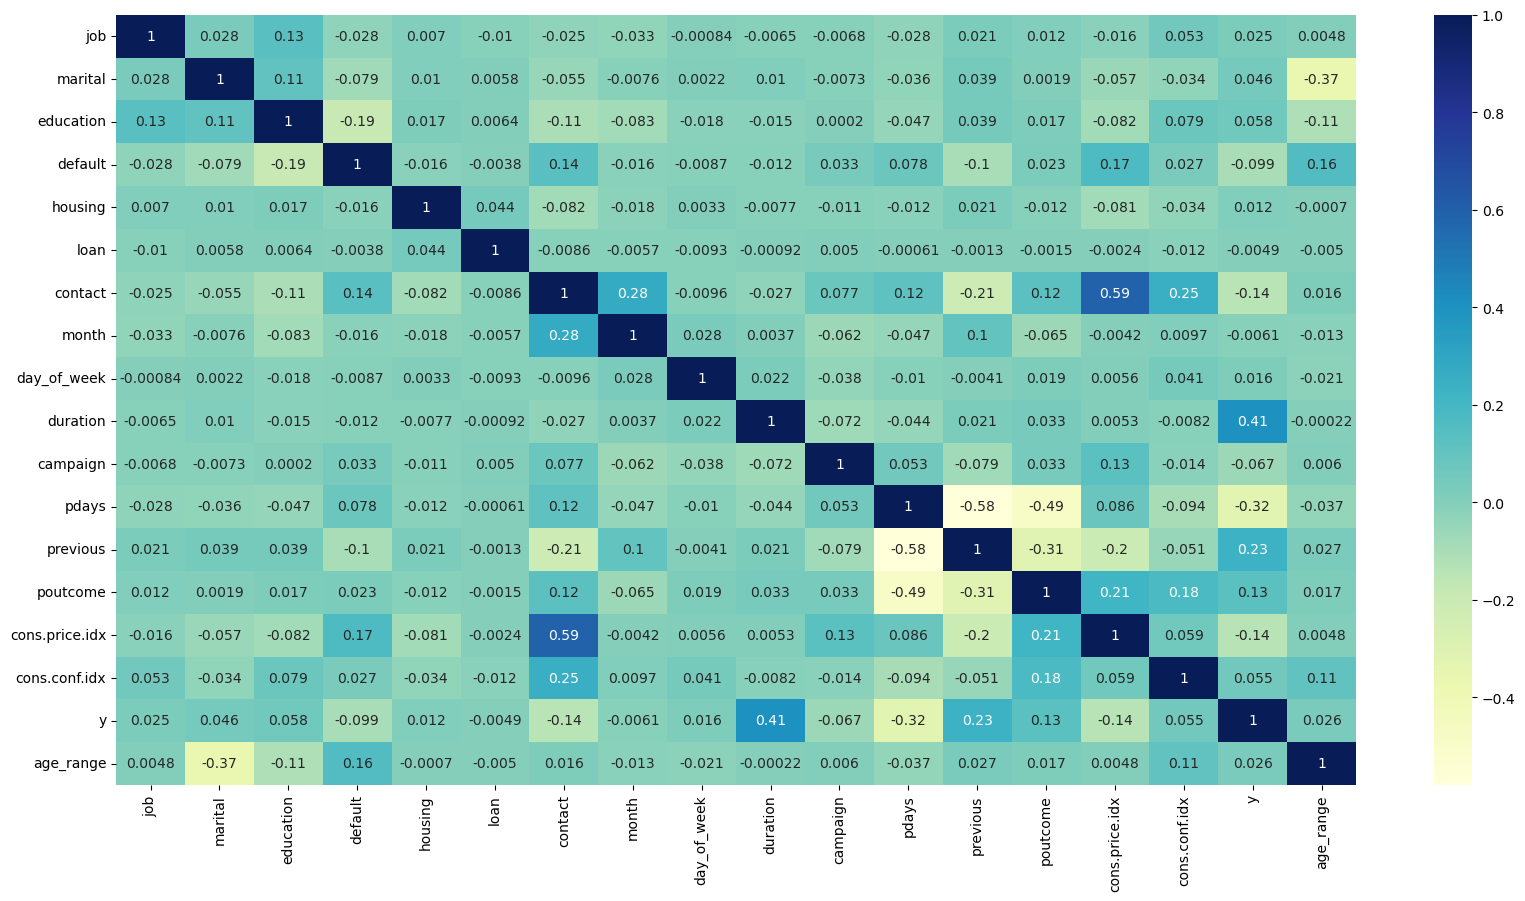

In [16]:
#Checking correlation again

plt.figure(figsize=(20,10))
sns.heatmap(bank_processed.corr(), annot=True, cmap='YlGnBu')

# Preparation for Models

In [17]:
from sklearn.model_selection import train_test_split

#Splitting Test and Train Data
X_data = bank_processed.drop(['y'], axis = 1)
y_data = bank_processed['y']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state = 37)

#Checking the shapes are correct
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32950, 17) (32950,)
(8238, 17) (8238,)


In [18]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Classification Models

## Decision Tree Model

0.887229910172372


Text(45.722222222222214, 0.5, 'Predicted Values')

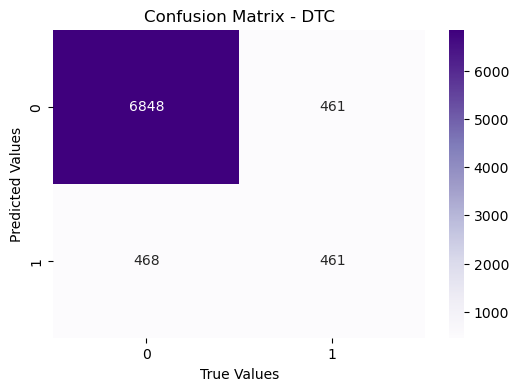

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(accuracy_dtc)

cm_dtc = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - DTC")
sns.heatmap(cm_dtc, annot=True, fmt='d',  cmap='Purples')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

## Logistic Regression Model

0.9024034959941734


Text(45.722222222222214, 0.5, 'Predicted Values')

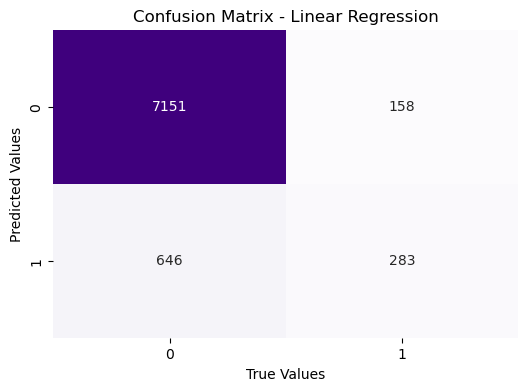

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(accuracy_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Linear Regression")
sns.heatmap(cm_lr, annot=True, fmt='d',  cmap='Purples', cbar=False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

## Random Forest Model

0.9126001456664239


Text(45.722222222222214, 0.5, 'Predicted Values')

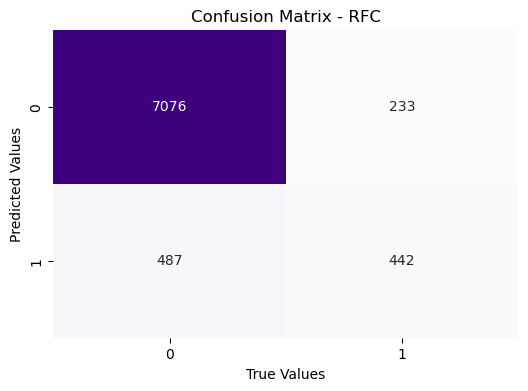

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(accuracy_rfc)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - RFC")
sns.heatmap(cm_rfc, annot=True, fmt='d',  cmap='Purples', cbar=False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

## K Nearest Neighbors Model

0.898761835396941


Text(45.722222222222214, 0.5, 'Predicted Values')

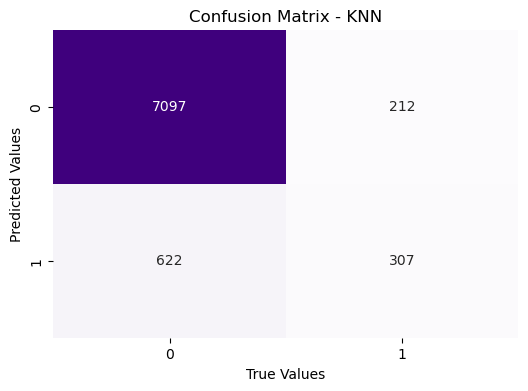

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(accuracy_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - KNN")
sns.heatmap(cm_knn, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

## Support Vector Machine Model

0.9051954357853847


Text(45.722222222222214, 0.5, 'Predicted Values')

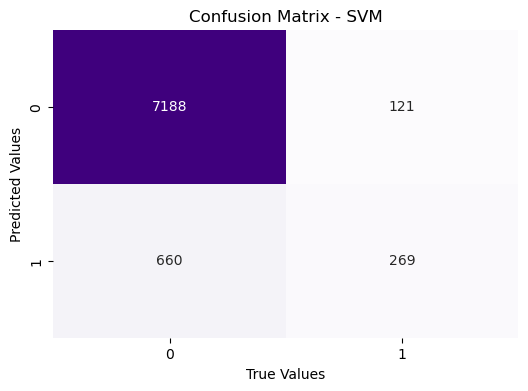

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm)

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - SVM")
sns.heatmap(cm_svm, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

## Gradient Boosting Model

0.915877640203933


Text(45.722222222222214, 0.5, 'Predicted Values')

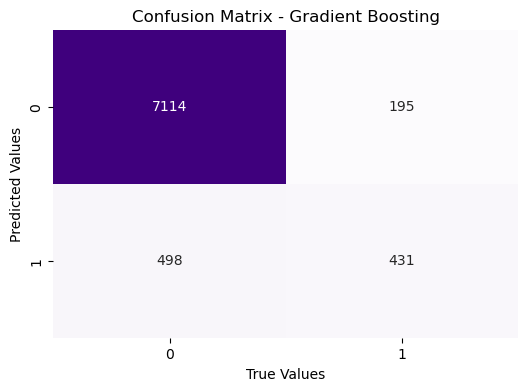

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(accuracy_gbc)

cm_gbc = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Gradient Boosting")
sns.heatmap(cm_gbc, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

## Naive Bayes Model

0.8729060451565914


Text(45.722222222222214, 0.5, 'Predicted Values')

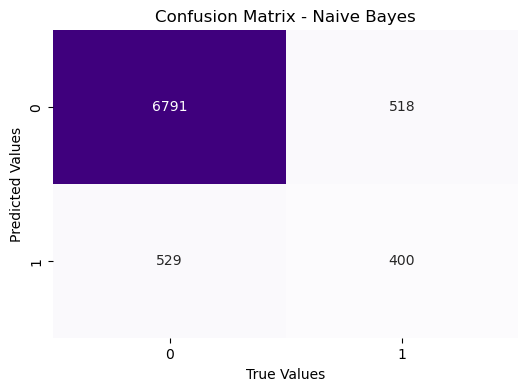

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(accuracy_gnb)

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix - Naive Bayes")
sns.heatmap(cm_gnb, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Evaluating Models

## Cross Validation Scores

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

models = {
    "Decision Tree": dtc,
    "Logistic Regression": lr,
    "Random Forest": rfc,
    "K Nearest Neighbors": knn,
    "Support Vector Machines": svm,
    "Gradient Boosting": gbc,
    "Naive Bayes": gnb
     }
preds = {
    "Decision Tree": y_pred_dtc,
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rfc,
    "K Nearest Neighbors": y_pred_knn,
    "Support Vector Machines": y_pred_svm,
    "Gradient Boosting": y_pred_gbc,
    "Naive Bayes": y_pred_gnb
    }

In [27]:
for modelName, y_pred in preds.items():
    print(f"{modelName}: ", classification_report(y_test, y_pred))

Decision Tree:                precision    recall  f1-score   support

           0       0.94      0.94      0.94      7309
           1       0.50      0.50      0.50       929

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238

Logistic Regression:                precision    recall  f1-score   support

           0       0.92      0.98      0.95      7309
           1       0.64      0.30      0.41       929

    accuracy                           0.90      8238
   macro avg       0.78      0.64      0.68      8238
weighted avg       0.89      0.90      0.89      8238

Random Forest:                precision    recall  f1-score   support

           0       0.94      0.97      0.95      7309
           1       0.65      0.48      0.55       929

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0

In [28]:
for modelName, model in models.items():
    cvs = cross_val_score(model, X_train, y_train, cv=kf).mean()
    print(f"{modelName}: ", cvs)

Decision Tree:  0.8857359635811836
Logistic Regression:  0.9051289833080425
Random Forest:  0.9118664643399089
K Nearest Neighbors:  0.8991198786039453
Support Vector Machines:  0.904764795144158
Gradient Boosting:  0.9142943854324734
Naive Bayes:  0.8699848254931716


## AUCs

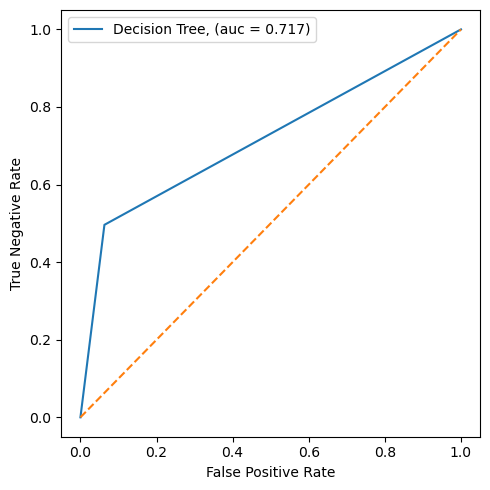

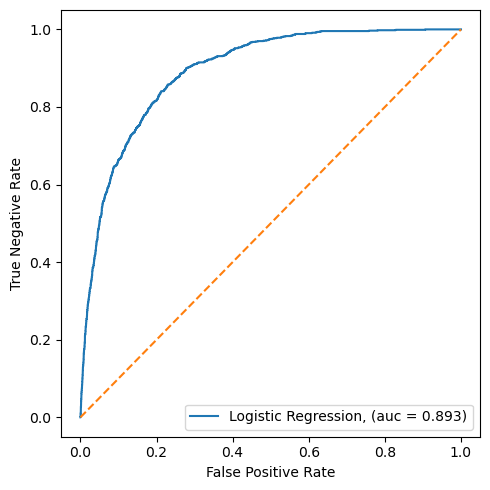

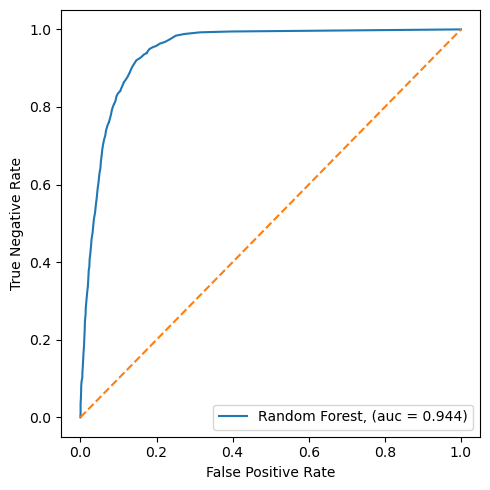

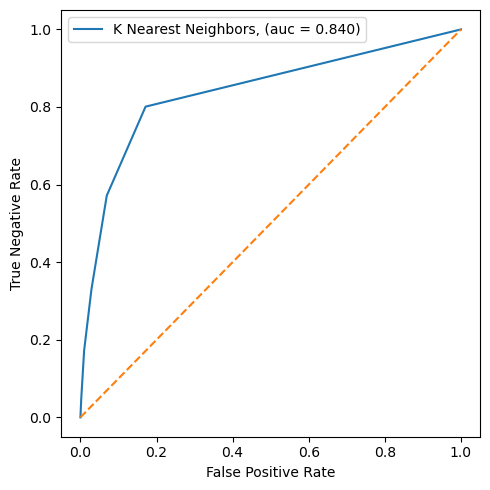

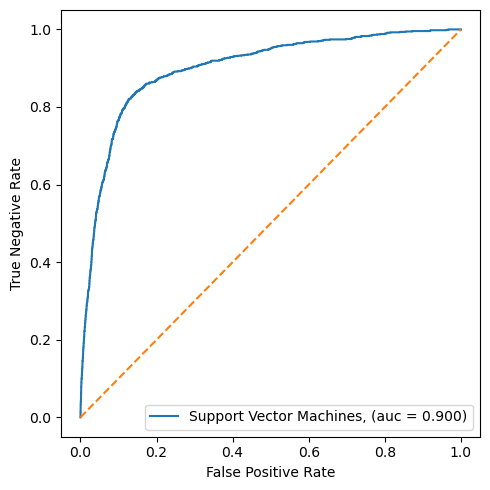

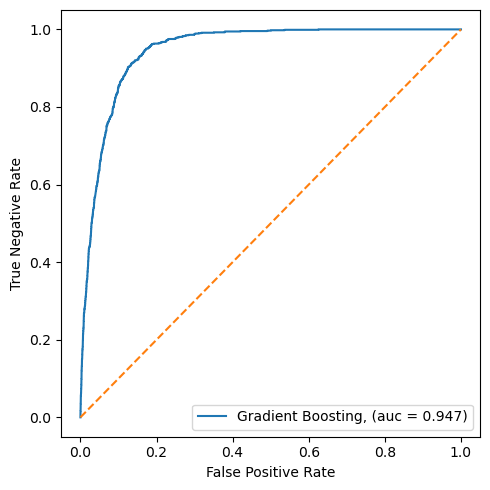

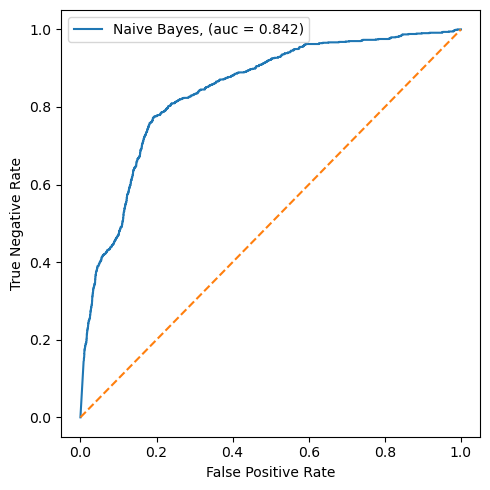

In [29]:
from sklearn import metrics
for modelName, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize =(5, 5))
    plt.plot(fpr, tpr, linestyle="-", label=f'{modelName}, (auc = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Negative Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Conclusions ROC and AUC
Both the Random Forest and Gradient Boosting model are the best performing models as their AUCs are far greater than other.
This indicates that both models have a good discrimination ability meaning they are able to distinguish between postive and negative classes effectively.

## Feature Importance

In [47]:
# Feature Importance of Gradient Boosting
fi_gb_df = pd.DataFrame({'Feature': X_data.columns, 'Importance': gbc.feature_importances_})
fi_gb_df = fi_gb_df.sort_values(by='Importance', ascending=False)
print(fi_gb_df)

           Feature    Importance
9         duration  4.531003e-01
11           pdays  1.828386e-01
15   cons.conf.idx  1.766940e-01
14  cons.price.idx  9.701157e-02
7            month  2.599099e-02
6          contact  2.153388e-02
13        poutcome  1.121193e-02
12        previous  9.285855e-03
16       age_range  7.598838e-03
8      day_of_week  6.527706e-03
3          default  4.111431e-03
10        campaign  1.993559e-03
2        education  1.430461e-03
0              job  6.708939e-04
1          marital  4.381200e-09
5             loan  0.000000e+00
4          housing  0.000000e+00


In [34]:
#Feature Importance of Random Forest Classifier
fi_rfc_df = pd.DataFrame({'Feature': X_data.columns, 'Importance': rfc.feature_importances_})
fi_rfc_df = fi_rfc_df.sort_values(by='Importance', ascending=False)
print(fi_rfc_df)

           Feature  Importance
9         duration    0.348503
15   cons.conf.idx    0.073500
14  cons.price.idx    0.061038
0              job    0.060967
8      day_of_week    0.058647
11           pdays    0.058081
2        education    0.053443
10        campaign    0.051546
13        poutcome    0.042663
16       age_range    0.039706
7            month    0.037792
1          marital    0.029912
4          housing    0.025441
12        previous    0.018146
5             loan    0.017746
6          contact    0.012907
3          default    0.009963


#### Conclusions - Feature Importances

Both classifiers rank "duration" as the most important feature, indicating that the duration of the call is a significant predictor of the outcome. GBC ranks "pdays" (number of days that passed by after the client was last
contacted ) as the second most important feature, while RFC ranks it as sixth. This suggests that GBC considers the number of days since the last contact more crucial compared to RFC.

cons.conf.idx (Consumer Confidence Index) and cons.price.idx (Consumer Price Index): Both classifiers rank these economic indicators among the top 5 features, although their exact positions may differ slightly.

Job and Day of Week: RFC assigns higher importance to these features compared to GBC, implying that RFC considers these factors more influential in predicting the outcome.

Education, Campaign, Poutcome (Previous campaign outcome), Age Range, and Month: These features are also important for both classifiers, although to what degree is unclear due to large differances in rankings between each classifier.
Marital status, Housing, Previous, Loan, Contact, and Default: These features generally have lower importance compared to others in both classifiers.

In conclusion, both GBC and RFC highlight similar important features for predicting the outcome, such as "duration," economic indicators, and certain demographic factors. However, the exact ranking of features may vary between the two classifiers, indicating differences in how they interpret the importance of each feature in the dataset.